# 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

from functions import utils, plotting

# 1. Load in DFT descriptors and define analysis criteria

In [2]:
dft_features_path = Path("../00_paper_dft_props/dft_opt_files/dft_sp_properties_summary_5kcalcut_new.csv")
crest_features_path = Path("../00_paper_dft_props/crest_sp_files/crest_sp_properties_summary_5kcalcut_new.csv")

weighted_term = 'low_E'

dft_props = pd.read_csv(dft_features_path)
crest_props = pd.read_csv(crest_features_path)
ligand_ids = dft_props['Ligand_ID'].to_list()

# 2. Process DFT descriptors

## 2.1. Define electronic, geometric and steric features and average across all ligands

### 2.1.1. Descriptors from DFT refined structures

In [3]:
# electronic descriptors
homo_boltz_av = dft_props[f'HOMO_{weighted_term}'].mean()
lumo_boltz_av = dft_props[f'LUMO_{weighted_term}'].mean()
dipole_boltz_av = dft_props[f'dipole(Debye)_{weighted_term}'].mean()
dft_props[f'NBO_av_charge_Cl_{weighted_term}'] = dft_props[[f'NBO_charge_Cl1_{weighted_term}', f'NBO_charge_Cl2_{weighted_term}']].mean(axis=1)
cl_nbo_boltz_av = dft_props[f'NBO_av_charge_Cl_{weighted_term}'].mean()
dft_props[f'NBO_av_charge_P_{weighted_term}'] = dft_props[[f'NBO_charge_P1_{weighted_term}', f'NBO_charge_P2_{weighted_term}']].mean(axis=1)
p_nbo_boltz_av = dft_props[f'NBO_av_charge_P_{weighted_term}'].mean()
pd_nbo_boltz_av = dft_props[f'NBO_charge_Pd_{weighted_term}'].mean()
dft_props[f'NMR_av_shift_P_{weighted_term}'] = dft_props[[f'NMR_shift_P1_{weighted_term}', f'NMR_shift_P2_{weighted_term}']].mean(axis=1)
p_nmr_boltz_av = dft_props[f'NMR_av_shift_P_{weighted_term}'].mean()
dft_props[f'aniso_NMR_av_shift_P_{weighted_term}'] = dft_props[[f'aniso_NMR_shift_P1_{weighted_term}', f'aniso_NMR_shift_P1_{weighted_term}']].mean(axis=1)
aniso_p_nmr_boltz_av = dft_props[f'aniso_NMR_av_shift_P_{weighted_term}'].mean()

# geometric descriptors
dft_props[f'distance_av_Pd_Cl(Å)_{weighted_term}'] = dft_props[[f'distance_Pd_Cl1(Å)_{weighted_term}', f'distance_Pd_Cl2(Å)_{weighted_term}']].mean(axis=1)
pd_cl_boltz_av = dft_props[f'distance_av_Pd_Cl(Å)_{weighted_term}'].mean()
dft_props[f'distance_av_Pd_P(Å)_{weighted_term}'] = dft_props[[f'distance_Pd_P1(Å)_{weighted_term}', f'distance_Pd_P2(Å)_{weighted_term}']].mean(axis=1)
pd_p_boltz_av = dft_props[f'distance_av_Pd_P(Å)_{weighted_term}'].mean()
bite_angle = dft_props[f'Bite_angle_Pd(°)_{weighted_term}'].mean()

# steric descriptors
vbur_3a_boltz_av = dft_props[f'%Vbur_Pd_3Å_{weighted_term}'].mean()
vbur_4a_boltz_av = dft_props[f'%Vbur_Pd_4Å_{weighted_term}'].mean()
vbur_5a_boltz_av = dft_props[f'%Vbur_Pd_5Å_{weighted_term}'].mean()
vbur_6a_boltz_av = dft_props[f'%Vbur_Pd_6Å_{weighted_term}'].mean()
vbur_7a_boltz_av = dft_props[f'%Vbur_Pd_7Å_{weighted_term}'].mean()
volume_boltz_av = dft_props[f'volume(Bohr_radius³/mol)_{weighted_term}'].mean()
sasa_boltz_av = dft_props[f'SASA_Pd_surface_area(Å²)_{weighted_term}'].mean()
gparam_boltz_av = dft_props[f'%G_param_Pd_{weighted_term}'].mean()
solid_angle_boltz_av = dft_props[f'Solid_angle_Pd(sr)_{weighted_term}'].mean()
solid_cone_angle_boltz_av = dft_props[f'Solid_cone_angle_Pd(°)_{weighted_term}'].mean()

### 2.1.2. Descriptors from CREST geometries

In [4]:
# electronic descriptors
cr_homo_boltz_av = crest_props[f'HOMO_{weighted_term}'].mean()
cr_lumo_boltz_av = crest_props[f'LUMO_{weighted_term}'].mean()
cr_dipole_boltz_av = crest_props[f'dipole(Debye)_{weighted_term}'].mean()
crest_props[f'NBO_av_charge_Cl_{weighted_term}'] = crest_props[[f'NBO_charge_Cl1_{weighted_term}', f'NBO_charge_Cl2_{weighted_term}']].mean(axis=1)
cr_cl_nbo_boltz_av = crest_props[f'NBO_av_charge_Cl_{weighted_term}'].mean()
crest_props[f'NBO_av_charge_P_{weighted_term}'] = crest_props[[f'NBO_charge_P1_{weighted_term}', f'NBO_charge_P2_{weighted_term}']].mean(axis=1)
cr_p_nbo_boltz_av = crest_props[f'NBO_av_charge_P_{weighted_term}'].mean()
cr_pd_nbo_boltz_av = crest_props[f'NBO_charge_Pd_{weighted_term}'].mean()
crest_props[f'NMR_av_shift_P_{weighted_term}'] = crest_props[[f'NMR_shift_P1_{weighted_term}', f'NMR_shift_P2_{weighted_term}']].mean(axis=1)
cr_p_nmr_boltz_av = crest_props[f'NMR_av_shift_P_{weighted_term}'].mean()
crest_props[f'aniso_NMR_av_shift_P_{weighted_term}'] = crest_props[[f'aniso_NMR_shift_P1_{weighted_term}', f'aniso_NMR_shift_P1_{weighted_term}']].mean(axis=1)
cr_aniso_p_nmr_boltz_av = crest_props[f'aniso_NMR_av_shift_P_{weighted_term}'].mean()

# geometric descriptors
crest_props[f'distance_av_Pd_Cl(Å)_{weighted_term}'] = crest_props[[f'distance_Pd_Cl1(Å)_{weighted_term}', f'distance_Pd_Cl2(Å)_{weighted_term}']].mean(axis=1)
cr_pd_cl_boltz_av = crest_props[f'distance_av_Pd_Cl(Å)_{weighted_term}'].mean()
crest_props[f'distance_av_Pd_P(Å)_{weighted_term}'] = crest_props[[f'distance_Pd_P1(Å)_{weighted_term}', f'distance_Pd_P2(Å)_{weighted_term}']].mean(axis=1)
cr_pd_p_boltz_av = crest_props[f'distance_av_Pd_P(Å)_{weighted_term}'].mean()
cr_bite_angle = crest_props[f'Bite_angle_Pd(°)_{weighted_term}'].mean()

# steric descriptors
cr_vbur_3a_boltz_av = crest_props[f'%Vbur_Pd_3Å_{weighted_term}'].mean()
cr_vbur_4a_boltz_av = crest_props[f'%Vbur_Pd_4Å_{weighted_term}'].mean()
cr_vbur_5a_boltz_av = crest_props[f'%Vbur_Pd_5Å_{weighted_term}'].mean()
cr_vbur_6a_boltz_av = crest_props[f'%Vbur_Pd_6Å_{weighted_term}'].mean()
cr_vbur_7a_boltz_av = crest_props[f'%Vbur_Pd_7Å_{weighted_term}'].mean()
cr_volume_boltz_av = crest_props[f'volume(Bohr_radius³/mol)_{weighted_term}'].mean()
cr_sasa_boltz_av = crest_props[f'SASA_Pd_surface_area(Å²)_{weighted_term}'].mean()
cr_gparam_boltz_av = crest_props[f'%G_param_Pd_{weighted_term}'].mean()
cr_solid_angle_boltz_av = crest_props[f'Solid_angle_Pd(sr)_{weighted_term}'].mean()
cr_solid_cone_angle_boltz_av = crest_props[f'Solid_cone_angle_Pd(°)_{weighted_term}'].mean()

## 2.2. Calculate percent and absolute differences between DFT refined and CREST descriptor sets

In [5]:
# % differences

homo_pc_diff = utils.percent_difference(homo_boltz_av, cr_homo_boltz_av)
lumo_pc_diff = utils.percent_difference(lumo_boltz_av, cr_lumo_boltz_av)
dipole_pc_diff = utils.percent_difference(dipole_boltz_av, cr_dipole_boltz_av)
cl_nbo_pc_diff = utils.percent_difference(cl_nbo_boltz_av, cr_cl_nbo_boltz_av)
p_nbo_pc_diff = utils.percent_difference(p_nbo_boltz_av, cr_p_nbo_boltz_av)
pd_nbo_pc_diff = utils.percent_difference(pd_nbo_boltz_av, cr_pd_nbo_boltz_av)
p_nmr_pc_diff = utils.percent_difference(p_nmr_boltz_av, cr_p_nmr_boltz_av)
aniso_p_nmr_pc_diff = utils.percent_difference(aniso_p_nmr_boltz_av, cr_aniso_p_nmr_boltz_av)

pd_cl_pc_diff = utils.percent_difference(pd_cl_boltz_av, cr_pd_cl_boltz_av)
pd_p_pc_diff = utils.percent_difference(pd_p_boltz_av, cr_pd_p_boltz_av)
bite_angle_pc_diff = utils.percent_difference(bite_angle, cr_bite_angle)

vbur_3a_pc_diff = utils.percent_difference(vbur_3a_boltz_av, cr_vbur_3a_boltz_av)
vbur_4a_pc_diff = utils.percent_difference(vbur_4a_boltz_av, cr_vbur_4a_boltz_av)
vbur_5a_pc_diff = utils.percent_difference(vbur_5a_boltz_av, cr_vbur_5a_boltz_av)
vbur_6a_pc_diff = utils.percent_difference(vbur_6a_boltz_av, cr_vbur_6a_boltz_av)
vbur_7a_pc_diff = utils.percent_difference(vbur_7a_boltz_av, cr_vbur_7a_boltz_av)
volume_pc_diff = utils.percent_difference(volume_boltz_av, cr_volume_boltz_av)
sasa_pc_diff = utils.percent_difference(sasa_boltz_av, cr_sasa_boltz_av)
gparam_pc_diff = utils.percent_difference(gparam_boltz_av, cr_gparam_boltz_av)
solid_angle_pc_diff = utils.percent_difference(solid_angle_boltz_av, cr_solid_angle_boltz_av)
solid_cone_angle_pc_diff = utils.percent_difference(solid_cone_angle_boltz_av, cr_solid_cone_angle_boltz_av)

In [6]:
# absolute differences

homo_diff = utils.difference(homo_boltz_av, cr_homo_boltz_av)
lumo_diff = utils.difference(lumo_boltz_av, cr_lumo_boltz_av)
dipole_diff = utils.difference(dipole_boltz_av, cr_dipole_boltz_av)
cl_nbo_diff = utils.difference(cl_nbo_boltz_av, cr_cl_nbo_boltz_av)
p_nbo_diff = utils.difference(p_nbo_boltz_av, cr_p_nbo_boltz_av)
pd_nbo_diff = utils.difference(pd_nbo_boltz_av, cr_pd_nbo_boltz_av)
p_nmr_diff = utils.difference(p_nmr_boltz_av, cr_p_nmr_boltz_av)
aniso_p_nmr_diff = utils.difference(p_nmr_boltz_av, cr_p_nmr_boltz_av)

pd_cl_diff = utils.difference(pd_cl_boltz_av, cr_pd_cl_boltz_av)
pd_p_diff = utils.difference(pd_p_boltz_av, cr_pd_p_boltz_av)
bite_angle_diff = utils.difference(bite_angle, cr_bite_angle)

vbur_3a_diff = utils.difference(vbur_3a_boltz_av, cr_vbur_3a_boltz_av)
vbur_4a_diff = utils.difference(vbur_4a_boltz_av, cr_vbur_4a_boltz_av)
vbur_5a_diff = utils.difference(vbur_5a_boltz_av, cr_vbur_5a_boltz_av)
vbur_6a_diff = utils.difference(vbur_6a_boltz_av, cr_vbur_6a_boltz_av)
vbur_7a_diff = utils.difference(vbur_7a_boltz_av, cr_vbur_7a_boltz_av)
volume_diff = utils.difference(volume_boltz_av, cr_volume_boltz_av)
sasa_diff = utils.difference(sasa_boltz_av, cr_sasa_boltz_av)
gparam_diff = utils.difference(gparam_boltz_av, cr_gparam_boltz_av)
solid_angle_diff = utils.difference(solid_angle_boltz_av, cr_solid_angle_boltz_av)
solid_cone_angle_diff = utils.difference(solid_cone_angle_boltz_av, cr_solid_cone_angle_boltz_av)

# 3. Plotting

## 3.1. Percentage and absolute value comparisons

### 3.1.1. Setup descriptors for plotting

In [7]:
# bar graph plot values

electronics = ['HOMO', 'LUMO', 'Dipole', 'Cl NBO', 'P NBO', 'Pd NBO', 'P NMR', 'Aniso \nP NMR']
electronic_values = [homo_pc_diff, lumo_pc_diff, dipole_pc_diff, cl_nbo_pc_diff, p_nbo_pc_diff,
                    pd_nbo_pc_diff, p_nmr_pc_diff, aniso_p_nmr_pc_diff]

steric = ['Solid \ncone angle', '%Vbur \n($r=$3 Å)', '%Vbur \n($r=$4 Å)', '%Vbur \n($r=$5 Å)', '%Vbur \n($r=$6 Å)', 
          '%Vbur \n($r=$7 Å)', 'Volume', 'SASA', ]
steric_values = [solid_cone_angle_pc_diff, vbur_3a_pc_diff, vbur_4a_pc_diff, vbur_5a_pc_diff, vbur_6a_pc_diff, 
                vbur_7a_pc_diff, volume_pc_diff, sasa_pc_diff, ]

geometric = ['Pd–Cl \ndistance', 'Pd–P \ndistance', 'Bite \nangle']
geometric_values = [pd_cl_pc_diff, pd_p_pc_diff, bite_angle_pc_diff]

fmos = ['HOMO', 'LUMO']
fmo_values = [homo_diff, lumo_diff]

nbos = ['Cl NBO', 'P NBO', 'Pd NBO']
nbo_values = [cl_nbo_diff, p_nbo_diff, pd_nbo_diff]

nmrs = ['P NMR', 'Aniso \nP NMR']
nmr_values = [p_nmr_diff, aniso_p_nmr_diff]

distances = ['Pd–Cl \ndistance', 'Pd–P \ndistance']
distance_values = [pd_cl_diff, pd_p_diff]

bite = ['Bite \nangle']
bite_value = [bite_angle_diff]

vburs = ['%VBur \n($r=$3 Å)', '%Vbur \n($r=$4 Å)', '%Vbur \n($r=$5 Å)', '%Vbur \n($r=$6 Å)', '%Vbur \n($r=$7 Å)']
vbur_values = [vbur_3a_diff, vbur_4a_diff, vbur_5a_diff, vbur_6a_diff, vbur_7a_diff]

volumes = ['Volume', 'SASA']
volume_values = [volume_diff, sasa_diff]

solid_angles = ['%G parameter', 'Solid angle', 'Solid cone angle']
solid_angle_values = [gparam_diff, solid_angle_diff, solid_cone_angle_diff]

### 3.1.2. Generate plots

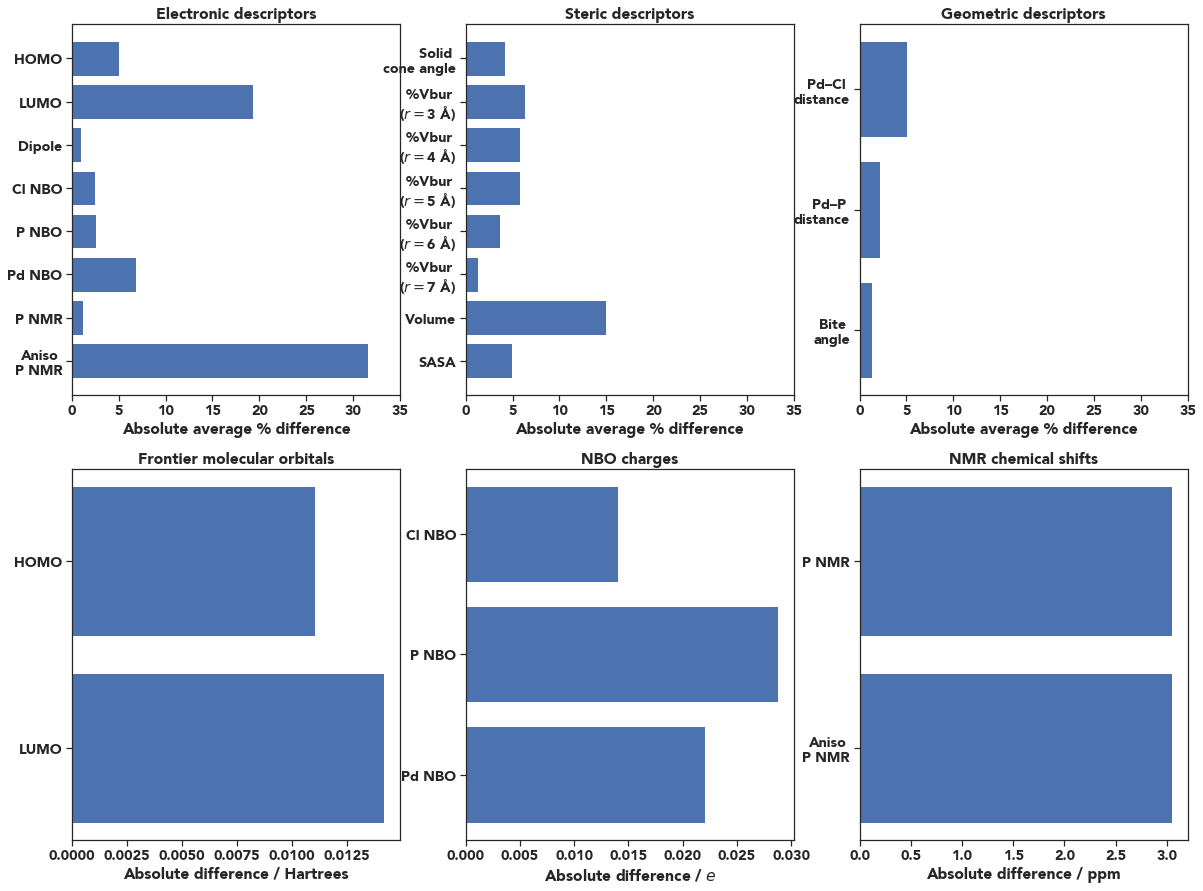

In [8]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

ax0.barh(electronics, electronic_values)
ax0.invert_yaxis()
ax0.set_title('Electronic descriptors')
ax0.set_xlabel('Absolute average % difference')
ax0.set_xlim(0, 35)

ax1.barh(steric, steric_values)
ax1.invert_yaxis()
ax1.set_title('Steric descriptors')
ax1.set_xlabel('Absolute average % difference')
ax1.set_xlim(0, 35)

ax2.barh(geometric, geometric_values)
ax2.invert_yaxis()
ax2.set_title('Geometric descriptors')
ax2.set_xlabel('Absolute average % difference')
ax2.set_xlim(0, 35)

ax3.barh(fmos, fmo_values)
ax3.invert_yaxis()
ax3.set_title('Frontier molecular orbitals')
ax3.set_xlabel('Absolute difference / Hartrees')

ax4.barh(nbos, nbo_values)
ax4.invert_yaxis()
ax4.set_title('NBO charges')
ax4.set_xlabel('Absolute difference / $e$')

ax5.barh(nmrs, nmr_values)
ax5.invert_yaxis()
ax5.set_title('NMR chemical shifts')
ax5.set_xlabel('Absolute difference / ppm')

plt.show()

In [ ]:
# co-linearity checks

import seaborn as sns
from scipy import stats
from matplotlib.font_manager import fontManager, FontProperties

path = '/usr/local/share/fonts/AvenirLTStd-Black.otf'
fontManager.addfont(path)

prop = FontProperties(fname=path)
sns.set(font=prop.get_name())
#sns.set_theme(context='notebook', style='darkgrid', font='Times')

In [ ]:
def plot_regression(x, y, ax):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    sns.regplot(x, y, ax=ax, color='#08708A')
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.text(0.05, 0.95, f"$R^2$ = {round(r_value**2, 2)}\n$p$-value = {p_value:.2e}", transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
    # plt.text(0.05, 0.97, f"$R^2$ = {round(r_value**2, 2)}\n$p$-value = {p_value:.2e}", transform=ax.transAxes, fontsize=12,
    #     verticalalignment='top', bbox=props)

## 3.2. Descriptor colinearity

### 3.2.1. Setup descriptors to plot

In [9]:
e_descriptor_list = [f'HOMO_{weighted_term}', f'LUMO_{weighted_term}', f'dipole(Debye)_{weighted_term}',
                    f'NBO_av_charge_Cl_{weighted_term}', f'NBO_av_charge_P_{weighted_term}', f'NBO_charge_Pd_{weighted_term}', 
                     f'NMR_av_shift_P_{weighted_term}', f'aniso_NMR_av_shift_P_{weighted_term}']

steric_descriptor_list = [f'Solid_cone_angle_Pd(°)_{weighted_term}', f'%Vbur_Pd_3Å_{weighted_term}', f'%Vbur_Pd_4Å_{weighted_term}', 
                         f'%Vbur_Pd_5Å_{weighted_term}', f'%Vbur_Pd_6Å_{weighted_term}',
                         f'%Vbur_Pd_7Å_{weighted_term}', f'volume(Bohr_radius³/mol)_{weighted_term}',
                         f'SASA_Pd_surface_area(Å²)_{weighted_term}']

geometric_descriptor_list = [f'distance_av_Pd_Cl(Å)_{weighted_term}', f'distance_av_Pd_P(Å)_{weighted_term}', f'Bite_angle_Pd(°)_{weighted_term}']

### 3.2.1. Plot electronic descriptors

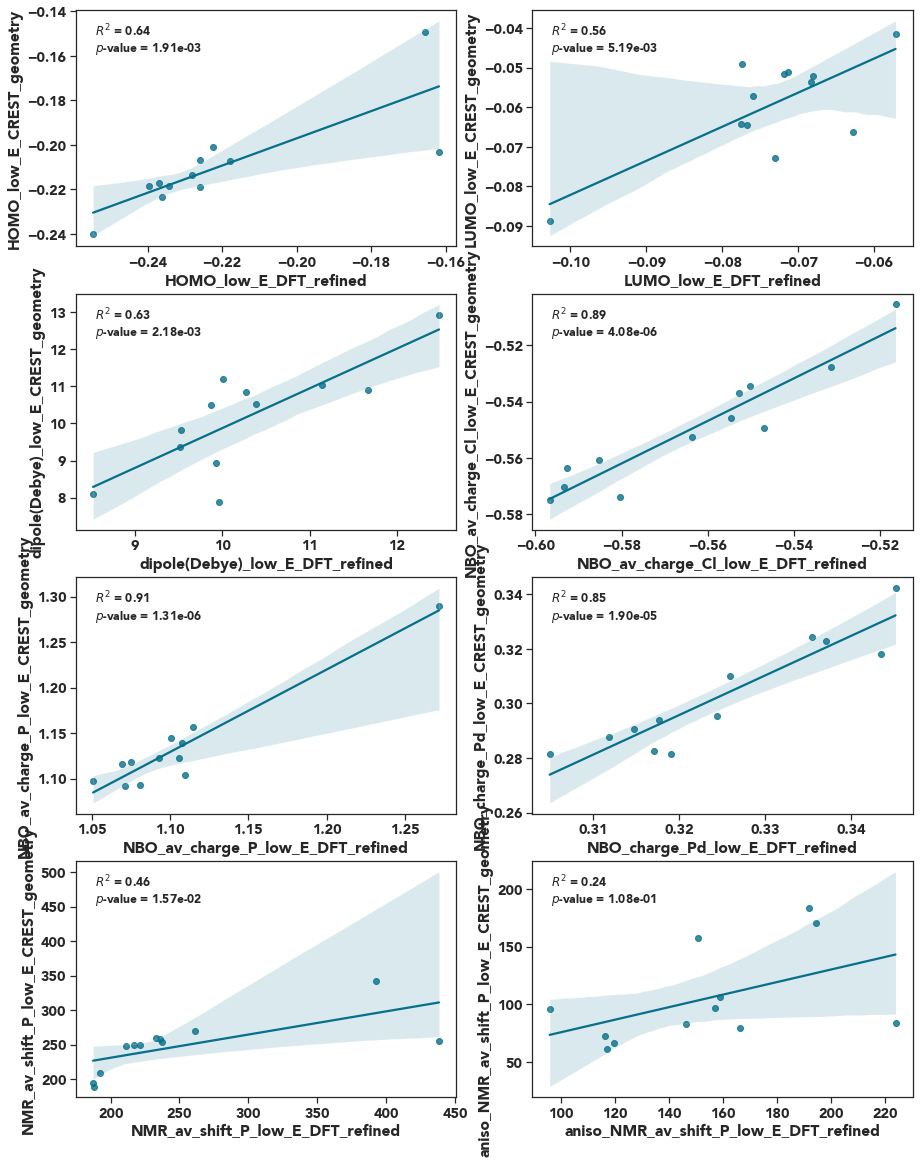

In [10]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, ax in zip(e_descriptor_list, axs.ravel()[:len(e_descriptor_list)]):
    plotting.plot_regression(dft_props[i], crest_props[i], ax=ax)
    ax.set_xlabel(f"{i}_DFT_refined")
    ax.set_ylabel(f"{i}_CREST_geometry")

### 3.2.2. Plot steric descriptors

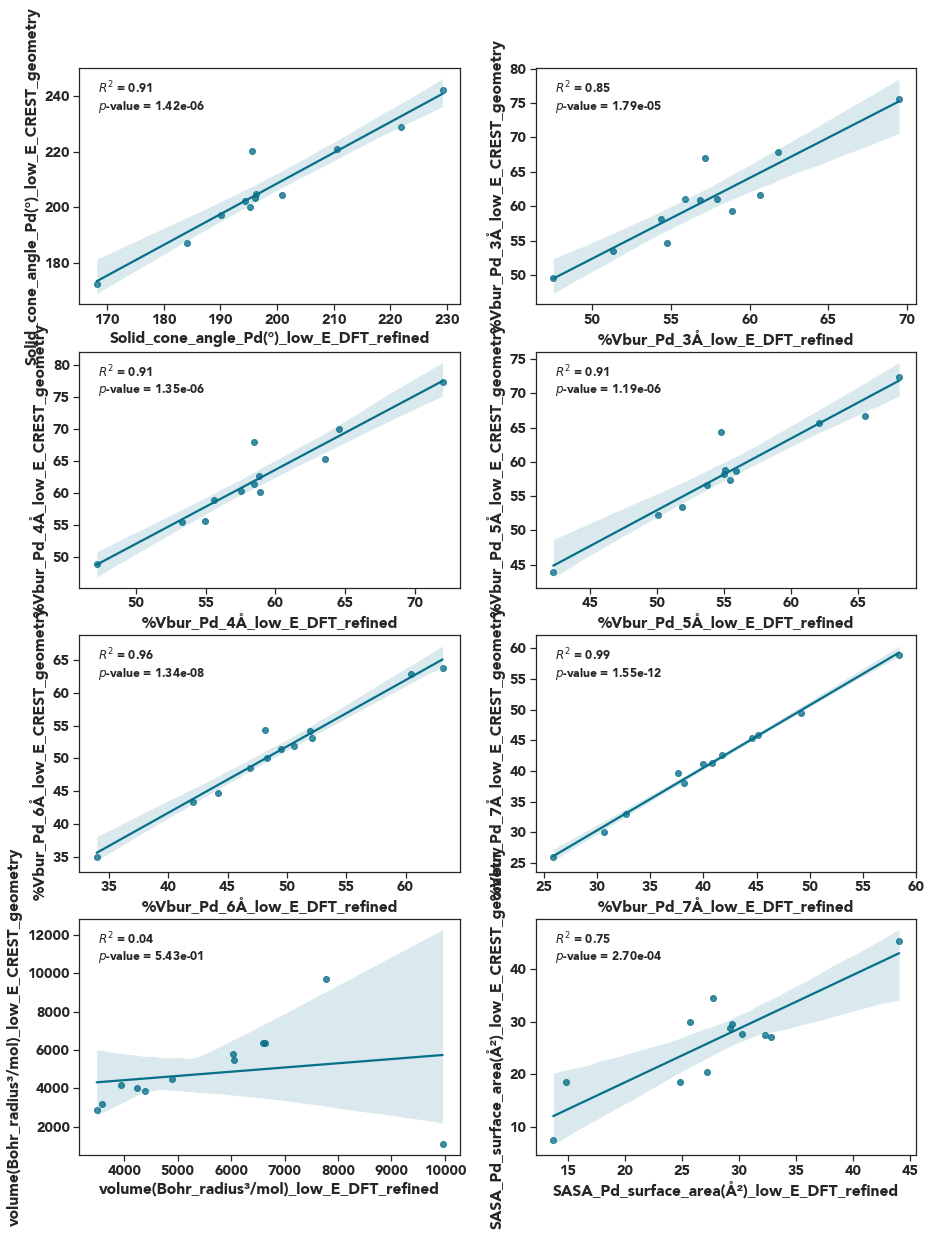

In [11]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, ax in zip(steric_descriptor_list, axs.ravel()[:len(steric_descriptor_list)]):
    plotting.plot_regression(dft_props[i], crest_props[i], ax=ax)
    ax.set_xlabel(f"{i}_DFT_refined")
    ax.set_ylabel(f"{i}_CREST_geometry")

### 3.2.3. Plot geometric descriptors

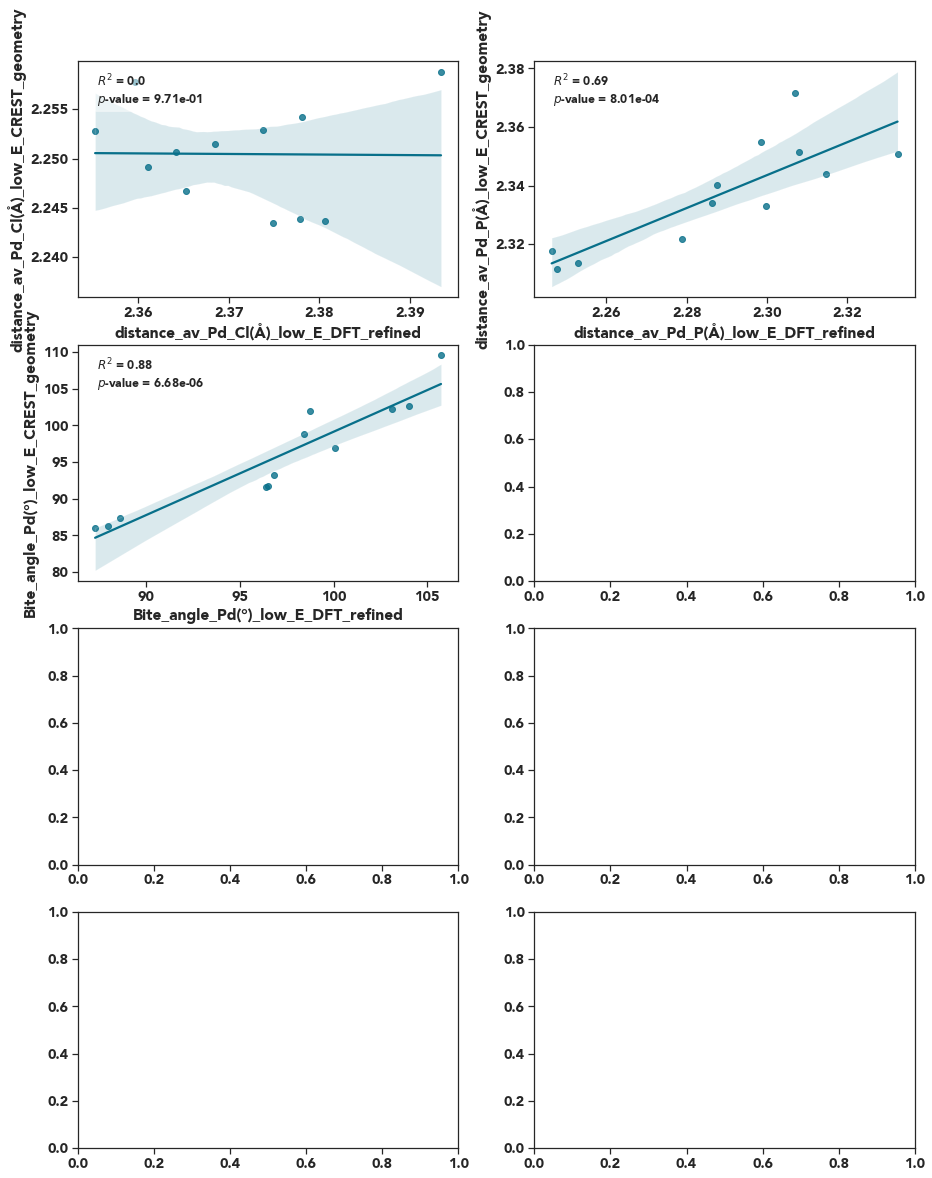

In [13]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, ax in zip(geometric_descriptor_list, axs.ravel()[:len(geometric_descriptor_list)]):
    plotting.plot_regression(dft_props[i], crest_props[i], ax=ax)
    ax.set_xlabel(f"{i}_DFT_refined")
    ax.set_ylabel(f"{i}_CREST_geometry")